<html>
<h2> 2 main problems in a learning algorithm to debug:</h2>
 <li> Overfitting (high-variance)</li>
 <li> UnderFitting (high-bias)</li>
 
 <h4> let's discuss those two common model issues by walking through the following illustration: </h4>
</html>


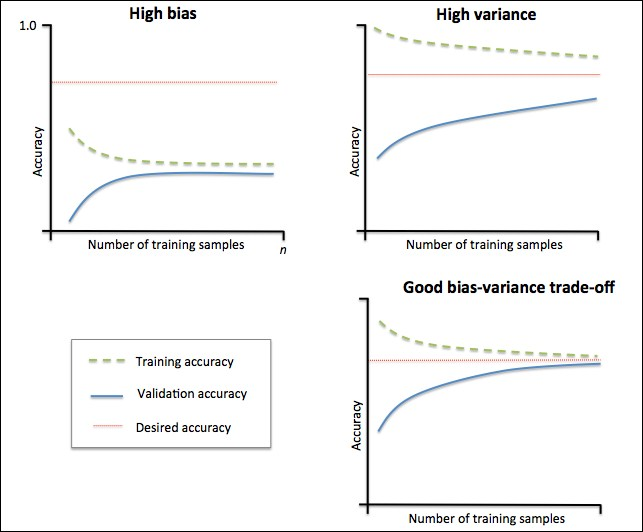

In [1]:
from IPython.display import Image
Image("/Users/surthi/gitrepos/ml-notes/images/bias-variance-tradeoff.jpg")

<html>
<h5> The graph in the upper-left shows a model with high bias. </h5>
 <ul>
     <li> This model has both low training and cross-validation accuracy.</li>
     <li> This indicates that it underfits the training data.</li>
     <li> <b>Common ways to address this issue are: </b>
         <ul>
         <li> to increase the number of parameters of the model </li>
         <li> like add more features </li>
         <li> decrease degree of regularization in SVM or logRegression </li>
         </ul>
      </li>
  </ul>
<h5> The graph in the upper-right shows a model with high variance. </h5>
 <ul>
     <li> This model has high gap between training and cross-validation accuracy.</li>
     <li> This indicates that it overfits the training data.</li>
     <li> <b>Common ways to address this issue are: </b>
         <ul>
         <li> to collect more training data </li>
         <li> reduce model complexity, reduce num features via feature selection or feature extraction </li>
         <li> increase degree of regularization in SVM or logRegression </li>
         </ul>
      </li>
  <ul>
</html>

<html>
<h2> Solutions that will help us diagnose above 2 mentioned problems:</h2>
 <li> Learning Curve </li>
 <li> Validation Curve </li>
 
 <h3> 1. Using learning curve and validation curve to improve performance </h3>
 <h4> How to diagnosing bias and variance problems with learning curves: </h4>
 If a model is too complex for a given training dataset—there are too many degrees of freedom or parameters in this model—the model tends to overfit the training data and does not generalize well to unseen data. Often, it can help to collect more training samples to reduce the degree of overfitting. However, in practice, it can often be very expensive or simply not feasible to collect more data. By plotting the model training and validation accuracies as functions of the training set size, we can easily detect whether the model suffers from high variance or high bias, and whether the collection of more data could help to address this problem.
 
<h5>Let's evaluate model using learning curve function from scikit-learn. For this we've to:</h5>
<ol>
<li> First, load training and test data </li>
<li> Then, plot learning_curve with logRegression estimator</li>
</ol>
</html>

In [ ]:
# 1.Load training data, test data and pipeline estimator
%run '6.1 Model Evaluation and HyperParameter Tuning.ipynb'

# 2.Plot learning_curve with logRegression
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
import numpy as np

p = Pipeline([('scl', StandardScaler()),
             ('lr', LogisticRegression(random_state=1))])

train_sizes, train_scores, test_scores = \
learning_curve(estimator=p, 
               X=X_train,
               y=y_train,
               train_sizes=np.linspace(0.1, 1.0, 10),
               cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# we add the standard deviation of the average accuracies to the plot using the fill_between
# function to indicate the variance of the estimate. This is the green and blue colored part
plt.plot(train_sizes, train_mean, marker='o', c='b', label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, marker='x', c='g', label='test accuracy', linestyle='--',)
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.legend(loc='best')
plt.grid()
plt.ylabel('Accuracy Score')
plt.xlabel('Training Samples Size')
plt.ylim(0.8,1.0)
plt.title('Model Evaluation using learning_curve\n [plt.fill_between() part which is highlighted in the green and blue color indicates the variance]\n\n [Analysis: our model performs quite well on the test dataset.\n However, it may be slightly overfitting the training data indicated by a relatively small,\n but visible, gap between the training and cross-validation accuracy curves.]\n')
plt.show()

# Addressing overfitting and underfitting with validation curves
Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters, for example, the inverse regularization parameter C in logistic regression.

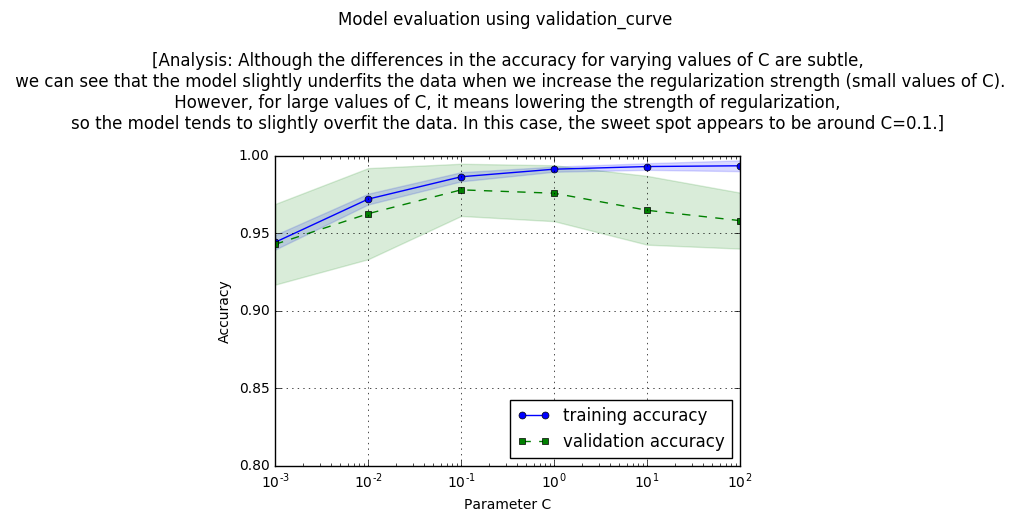

In [56]:
from sklearn.learning_curve import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=p, 
    X=X_train,
    y=y_train,
    param_name='lr__C',
    param_range=param_range,
    cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.title('Model evaluation using validation_curve \n\n[Analysis: Although the differences in the accuracy for varying values of C are subtle,\n we can see that the model slightly underfits the data when we increase the regularization strength (small values of C).\n However, for large values of C, it means lowering the strength of regularization, \nso the model tends to slightly overfit the data. In this case, the sweet spot appears to be around C=0.1.]\n')
plt.show()

Q&A:
    <li>understand high variance & high bias</li>
    <li> understand validation curve analysis</li>